In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
data = pd.read_csv('D:/Study/doancn/FireNet/Datamodel/smoke_detection_iot.csv')

In [3]:
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
data['CNT'].value_counts()

0        5
866      5
774      5
773      5
772      5
        ..
12158    2
12157    2
12156    2
12155    2
24993    2
Name: CNT, Length: 24994, dtype: int64

In [5]:
data['CNT'].describe()

count    62630.000000
mean     10511.386157
std       7597.870997
min          0.000000
25%       3625.250000
50%       9336.000000
75%      17164.750000
max      24993.000000
Name: CNT, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [7]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

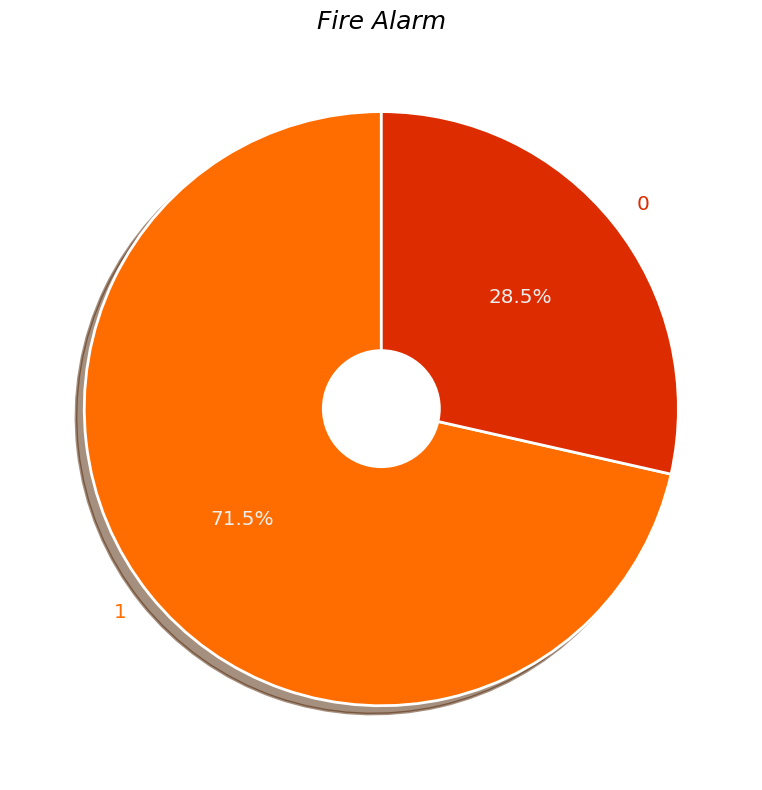

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
colors2=['#ff6d00','#dd2c00']
patches, texts, pcts = ax.pie(
    data['Fire Alarm'].value_counts(), labels=[*data['Fire Alarm'].value_counts().index],shadow=True, autopct='%.1f%%',colors=colors2
    ,wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#EEEEEE')
plt.setp(texts, fontweight=200)
centre_circle = plt.Circle((0,0),0.20,fc='white') 
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='Fire Alarm',fontsize=18,fontstyle='italic')

plt.tight_layout()

### The percentage that the Fire Alarm worked and the percentage of not working

## Temperature

<Figure size 600x400 with 0 Axes>

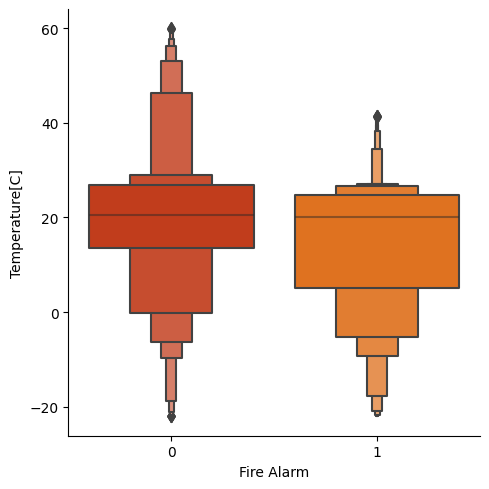

In [9]:
plt.figure(figsize=(6,4))
sns.catplot(data=data,x='Fire Alarm',y='Temperature[C]',kind='boxen',palette=['#dd2c00','#ff6d00'])

In [10]:
palette = ['#dd2c00','#ff6d00']

#### We note that in the cases in which the fire alarm worked, temperatures were between -20 and 40
#### We note that in the cases in which the fire alarm did not work, temperatures were between -20 and 60

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

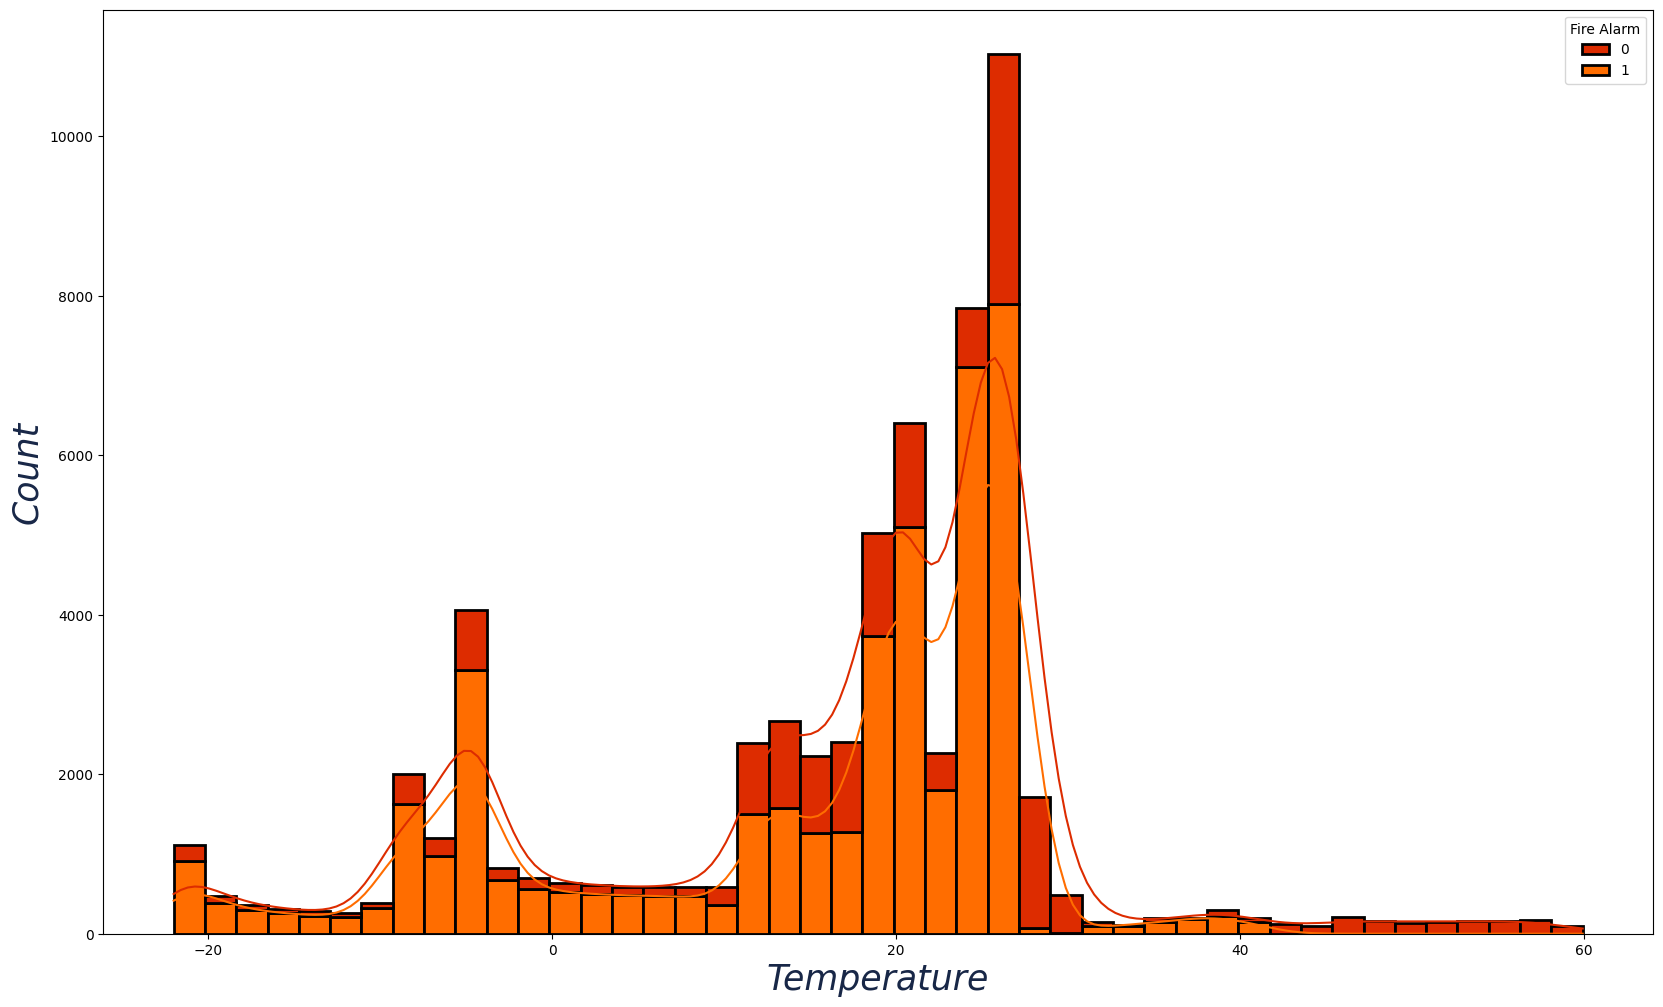

In [11]:
plt.figure(figsize=(20,12))
plt.tight_layout(pad=5)
plt.xlabel(fontsize=25,color='#182747',xlabel='Temperature',fontstyle='italic')
plt.ylabel(fontsize=25,color='#182747',ylabel='Count',fontstyle='italic')
sns.histplot(x=data['Temperature[C]'],hue=data['Fire Alarm'],hue_order=data['Fire Alarm'].value_counts(ascending=True).index,multiple="stack",palette=palette,kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)

#### The largest percentage of temperatures combined between 10 and 30, and a smaller percentage between -11 and 0

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

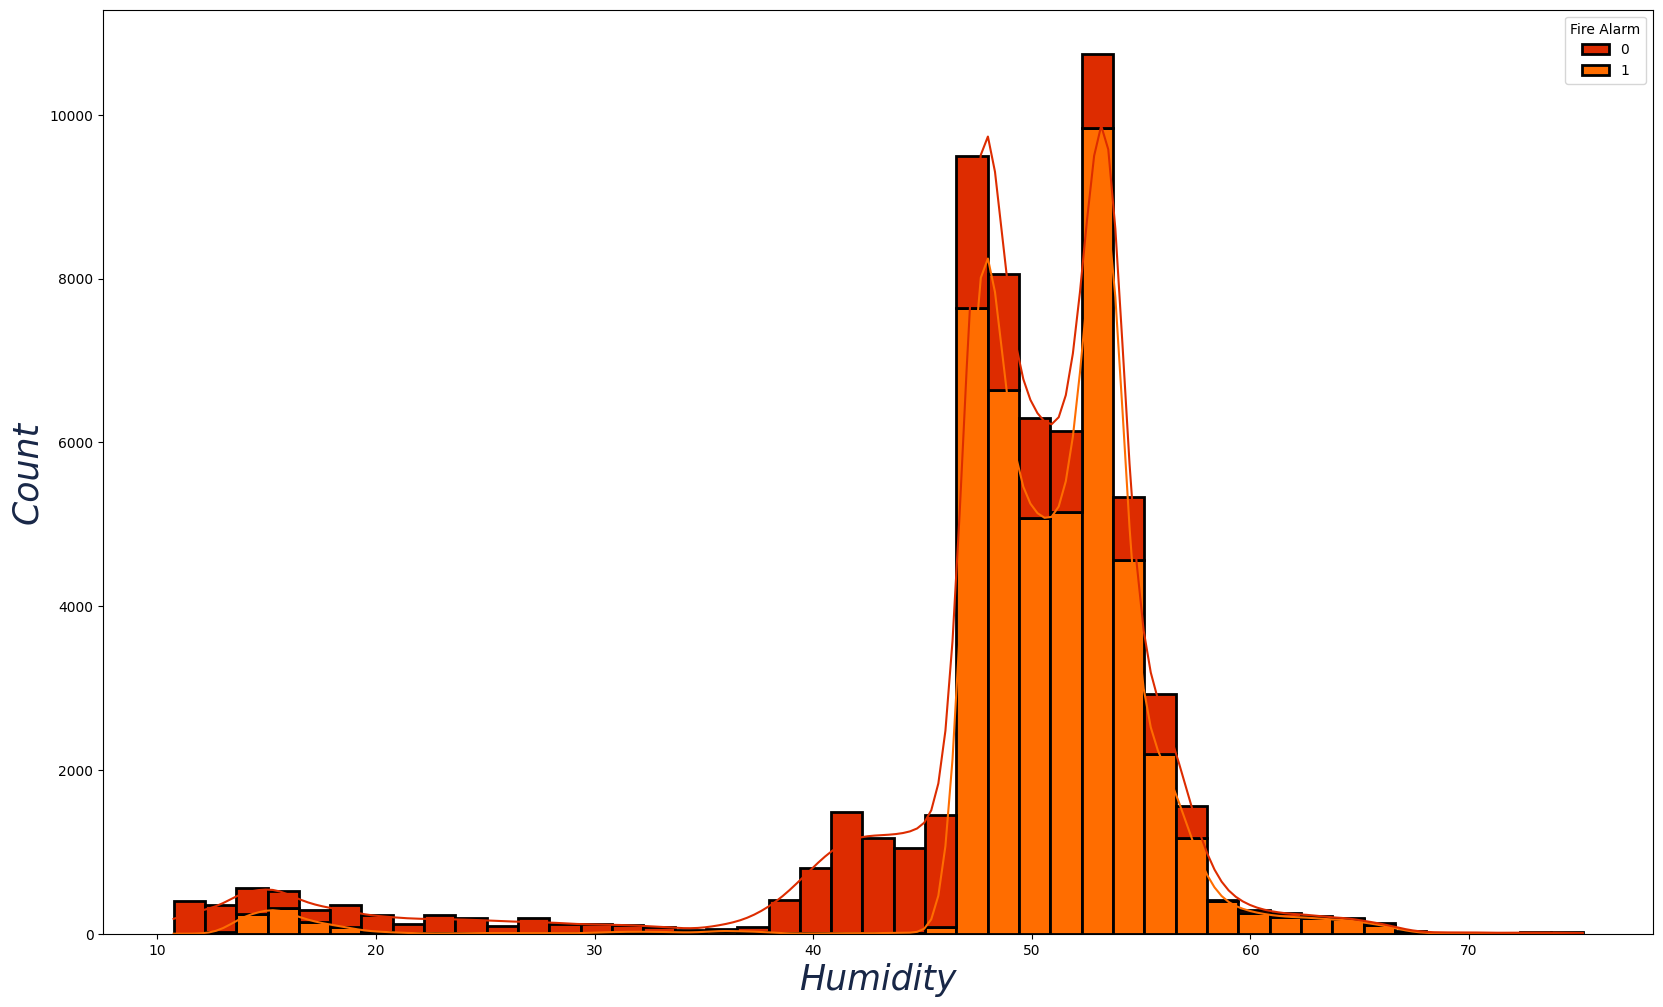

In [12]:
plt.figure(figsize=(20,12))
plt.tight_layout(pad=5)
plt.xlabel(fontsize=25,color='#182747',xlabel='Humidity',fontstyle='italic')
plt.ylabel(fontsize=25,color='#182747',ylabel='Count',fontstyle='italic')
sns.histplot(x=data['Humidity[%]'],hue=data['Fire Alarm'],hue_order=data['Fire Alarm'].value_counts(ascending=True).index,multiple="stack",palette=palette,kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)

#### The fire alarm works when the humidity is between 46% and 66%.
#### The fire alarm does not work when the humidity is between 38% and 64%.

Let's have a look on the distribution of particulate matter values :


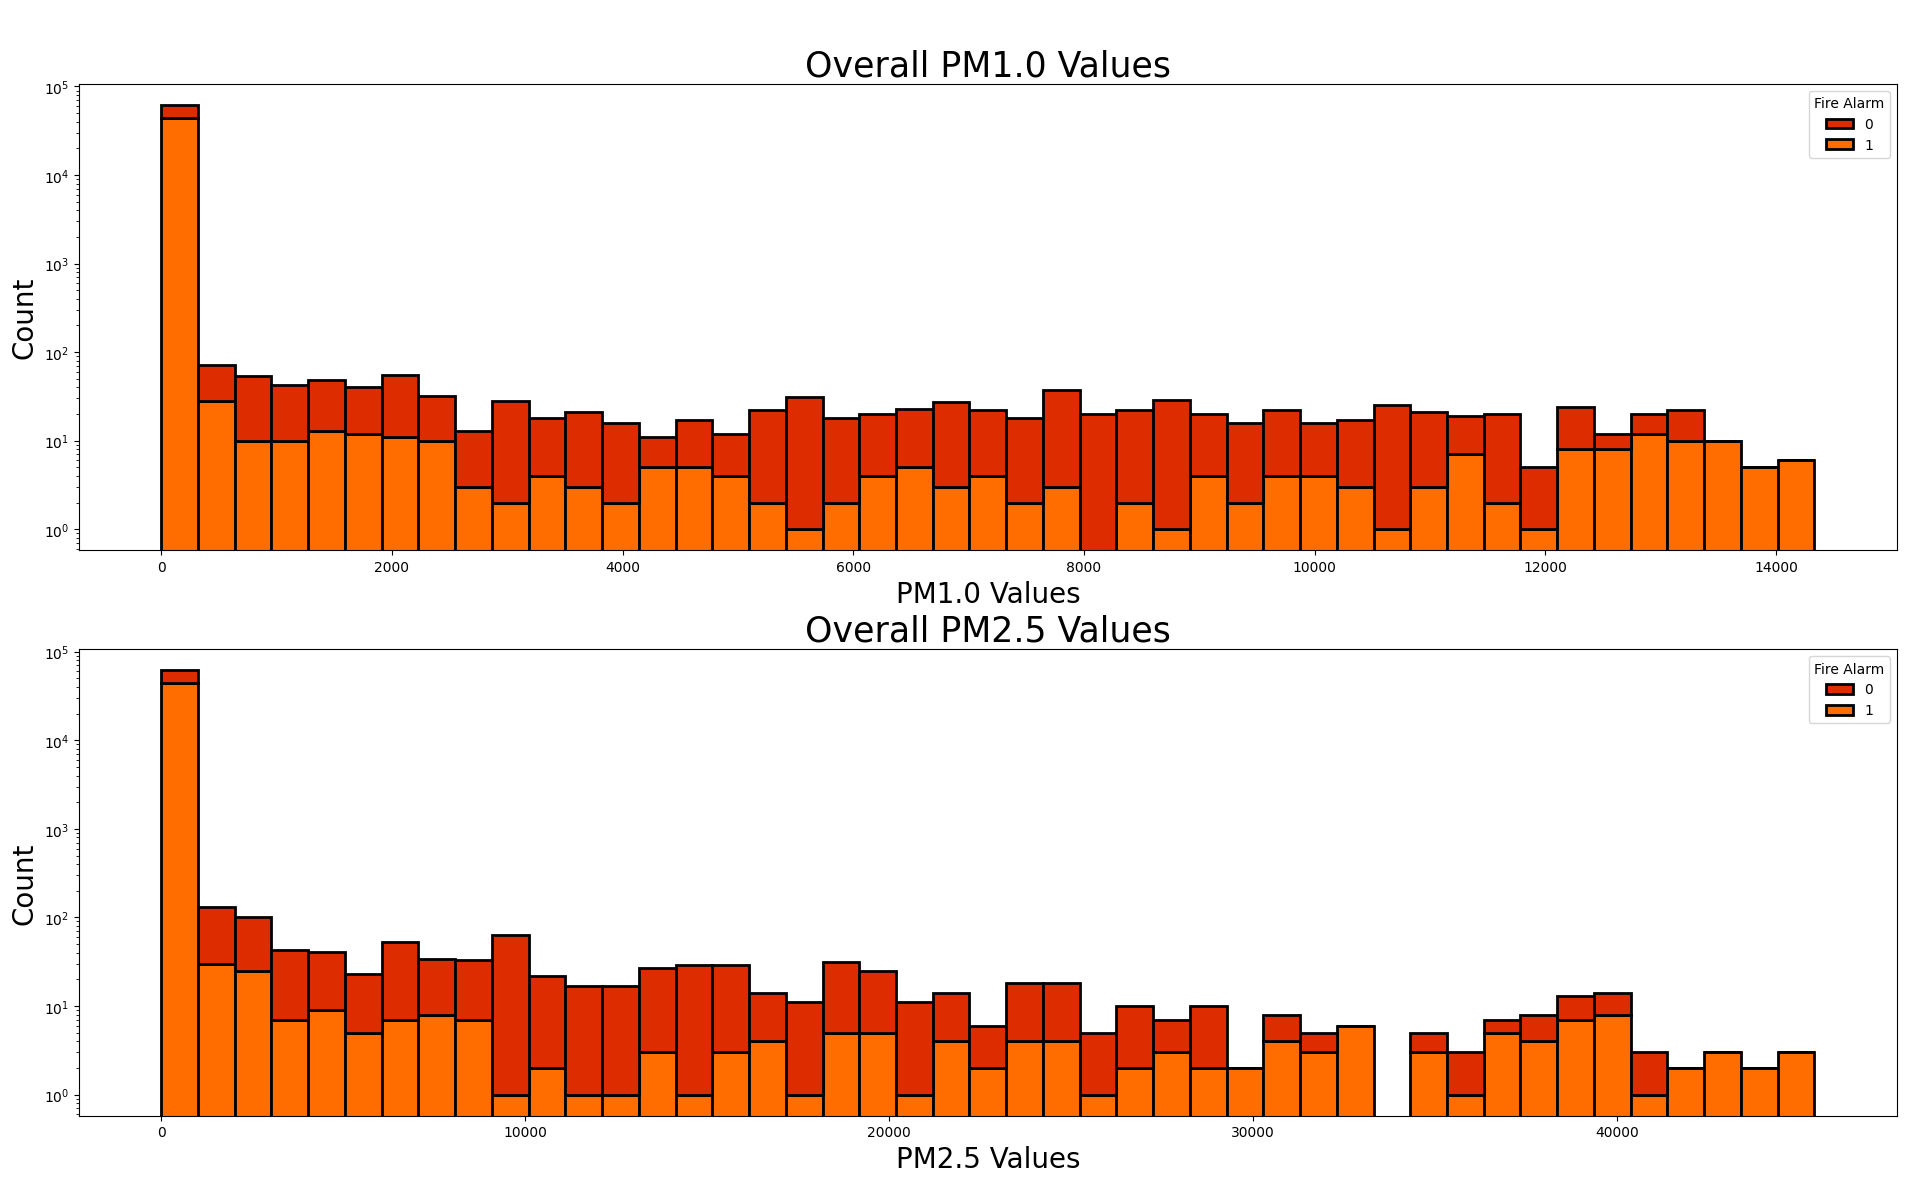

In [13]:
print(f"Let's have a look on the distribution of particulate matter values :")
_, axs = plt.subplots(2,1,figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="PM1.0",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[0],palette=palette,kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[0].set_title("\nOverall PM1.0 Values",fontsize=25)
axs[0].set_ylabel("Count",fontsize=20)
axs[0].set_xlabel("PM1.0 Values",fontsize=20)
axs[0].set_yscale("linear")

sns.histplot(data=data,x="PM2.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[1],palette=palette,kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[1].set_title("\nOverall PM2.5 Values",fontsize=25)
axs[1].set_ylabel("Count",fontsize=20)
axs[1].set_xlabel("PM2.5 Values",fontsize=20)
axs[1].set_yscale("log")

plt.show()

#### There is no significant correlation between the overall PM 1.0 + 2.5 and Fire Alarm

Let's have a look on the distribution of the concentration of particulate matter values :


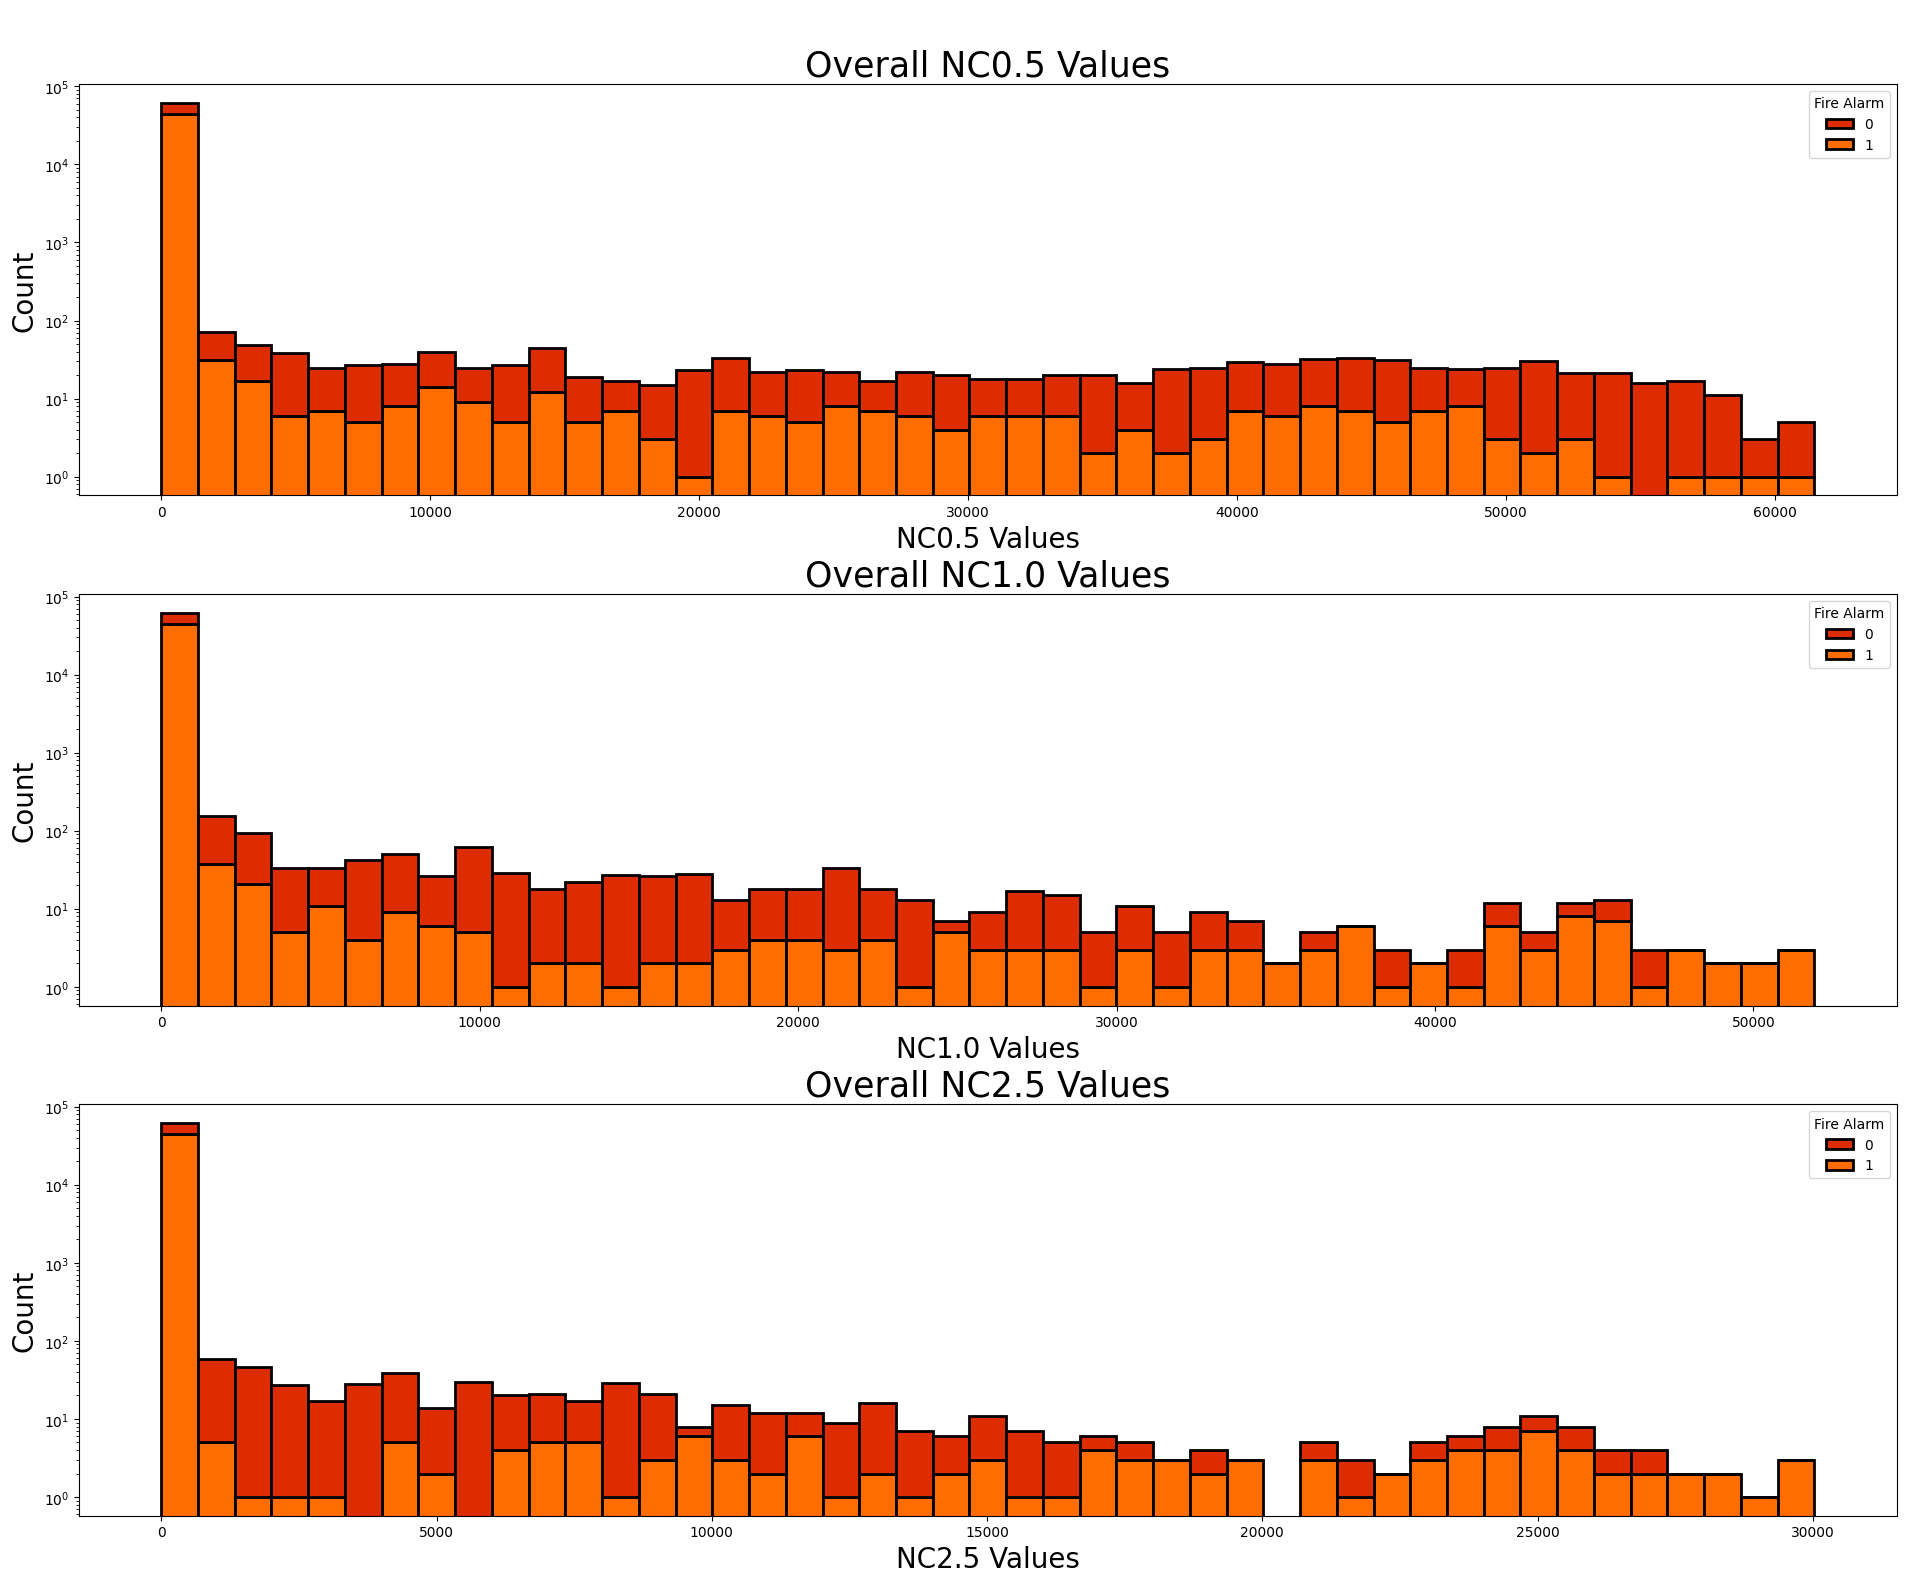

In [14]:
print(f"Let's have a look on the distribution of the concentration of particulate matter values :")
_, axs = plt.subplots(3,1,figsize=(20,16), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="NC0.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[0],palette=palette,kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[0].set_title("\nOverall NC0.5 Values",fontsize=25)
axs[0].set_ylabel("Count",fontsize=20)
axs[0].set_xlabel("NC0.5 Values",fontsize=20)
axs[0].set_yscale("linear")

sns.histplot(data=data,x="NC1.0",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[1],palette=palette,kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[1].set_title("\nOverall NC1.0 Values",fontsize=25)
axs[1].set_ylabel("Count",fontsize=20)
axs[1].set_xlabel("NC1.0 Values",fontsize=20)
axs[1].set_yscale("log")

sns.histplot(data=data,x="NC2.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[2],palette=palette,kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[2].set_title("\nOverall NC2.5 Values",fontsize=25)
axs[2].set_ylabel("Count",fontsize=20)
axs[2].set_xlabel("NC2.5 Values",fontsize=20)
axs[2].set_yscale("log")

plt.show()

#### There is no significant correlation between the overall NC 0.5 + 1.0 + 2.5 and Fire Alarm

<AxesSubplot:>

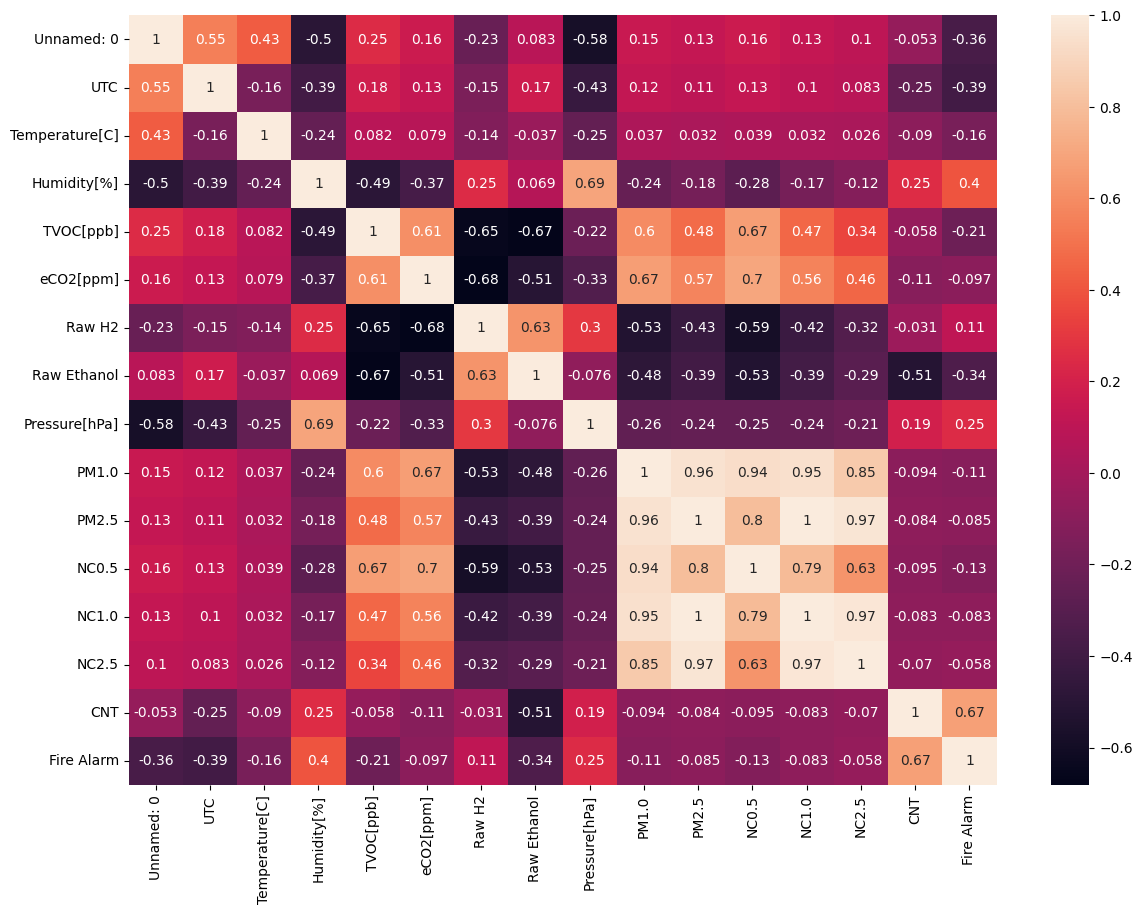

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)

In [16]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [10]:
data_important = data[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]','PM1.0','Fire Alarm']]
data_important.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0


<AxesSubplot:>

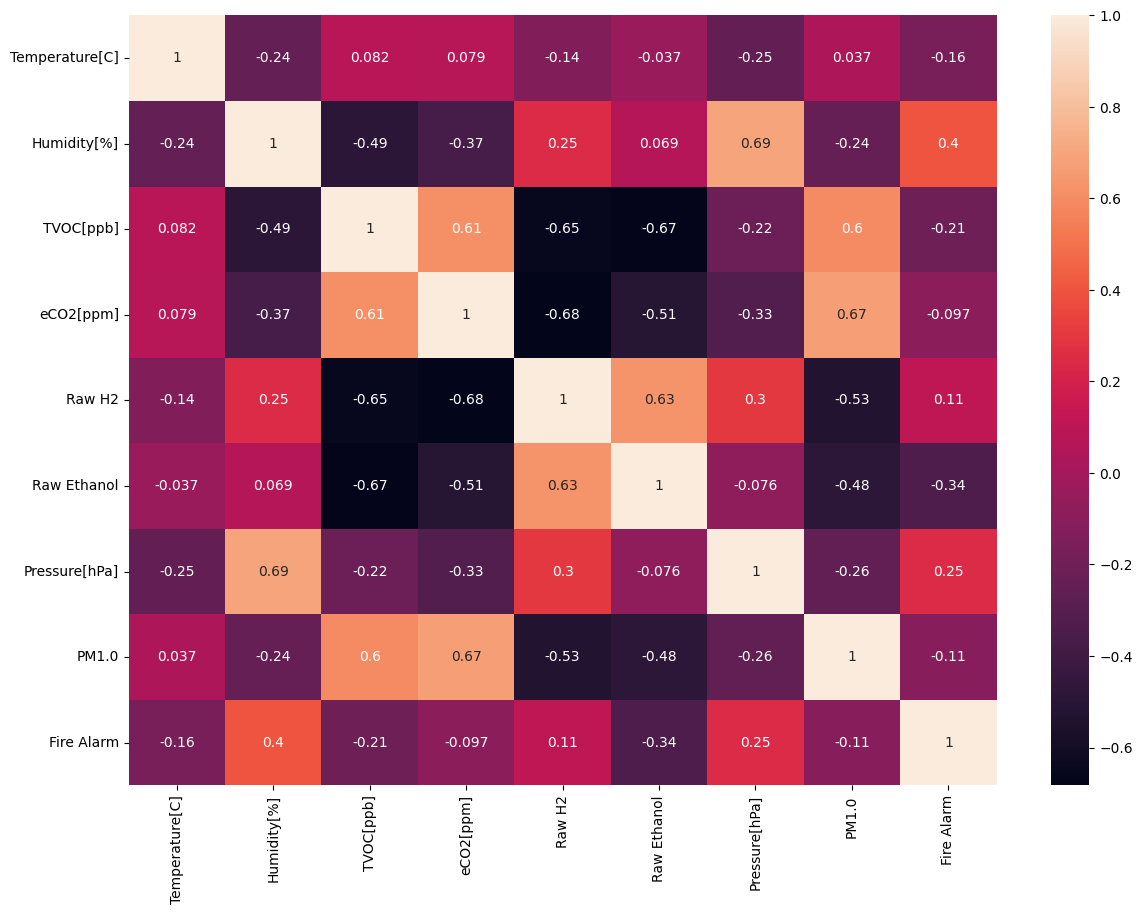

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(data_important.corr(),annot=True)

In [12]:
x= data_important.drop('Fire Alarm',axis=1).values
y= data_important['Fire Alarm'].values

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [14]:
x_train.shape

(50104, 8)

In [15]:
y_test.shape

(12526,)

1.Random Forest

In [16]:
from sklearn.ensemble import  RandomForestClassifier
rf=RandomForestClassifier(max_depth=18,max_features=9,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, max_features=9, random_state=42)

In [17]:
print('Random Forest Train Score is : ' , rf.score(x_train, y_train))
print('Random Forest Test Score is : ' , rf.score(x_test, y_test))

Random Forest Train Score is :  1.0
Random Forest Test Score is :  0.9998403321092129


In [18]:
rf.predict(x_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [27]:
Y_pred_rf = rf.predict(x_test)
show = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred_rf})
show.head(10)

,Y_test,Y_pred
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


In [28]:
y_test

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [29]:
Y_pred_rf

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [30]:
show = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred_rf})
show.head(15)

,Y_test,Y_pred
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


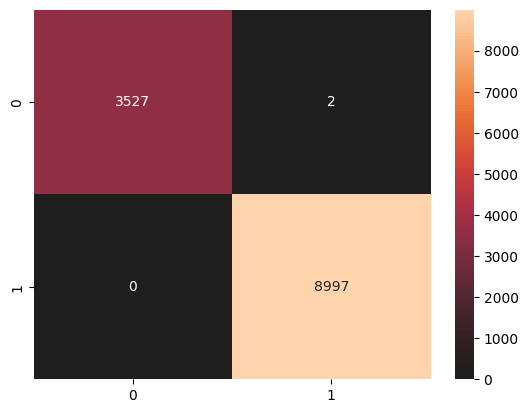

Confusion Matrix is
 [[3527    2]
 [   0 8997]]


In [31]:
y_pred_rf = rf.predict(x_test)
CM_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(CM_rf, center=True, annot=True,fmt='g')
plt.show()

print('Confusion Matrix is\n', CM_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3529
           1       1.00      1.00      1.00      8997

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

[[3527    2]
 [   0 8997]]


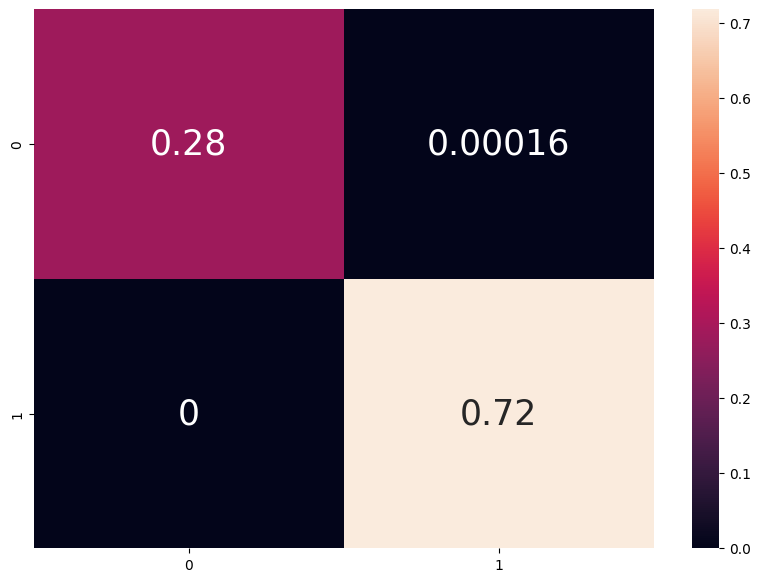

In [32]:
Y_pred_rf = rf.predict(x_test)
Y_pred_rf = (Y_pred_rf > 0.4)
np.set_printoptions()

plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, Y_pred_rf)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})
print(classification_report(y_test, Y_pred_rf))
print(cf_matrix)

In [35]:
# Save model
import joblib
filename = 'D:\Study\doancn\FireNet\Codes\TrainedModels\Fire_data.sav'
joblib.dump(rf, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
# test with sample data
ab=[20.79,47.72,1210,400,12927,19426,938.709,0]
result = loaded_model.predict([ab])
print(result)

[1]


In [32]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics
print( "Train score is :", rf.score(x_train,y_train))
print( "Test score is :", r2_score(y_test,Y_pred_rf))
print( "MAE =" ,mean_absolute_error(y_test, Y_pred_rf))

Train score is : 1.0
Test score is : 0.9992109708935125
MAE = 0.0001596678907871627


In [26]:
#test
ab=[20.79,47.72,1210,400,12927,19426,938.709,0]

rf.predict([ab])

ValueError: Expected 2D array, got 1D array instead:
array=[   20.79     47.72   1210.      400.    12927.    19426.      938.709].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

2.K Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 7,weights ='distance',algorithm='auto')
KNNClassifierModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [45]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(x_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(x_test, y_test))

KNNClassifierModel Train Score is :  1.0
KNNClassifierModel Test Score is :  0.9995209963276385


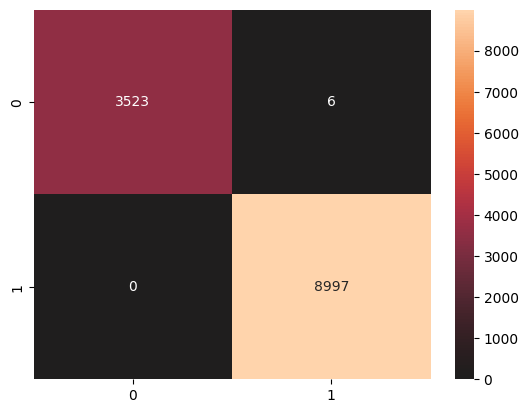

Confusion Matrix is
 [[3523    6]
 [   0 8997]]


In [60]:
y_pred_K = KNNClassifierModel.predict(x_test)
CM_K = confusion_matrix(y_test, y_pred_K)

sns.heatmap(CM_K, center=True, annot=True,fmt='g')
plt.show()

print('Confusion Matrix is\n', CM_K)

3.Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=44) 
GBCModel.fit(x_train, y_train)


GradientBoostingClassifier(random_state=44)

In [46]:

print('GBCModel Train Score is : ' , GBCModel.score(x_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(x_test, y_test))

GBCModel Train Score is :  0.9998602905955613
GBCModel Test Score is :  0.9997604981638193


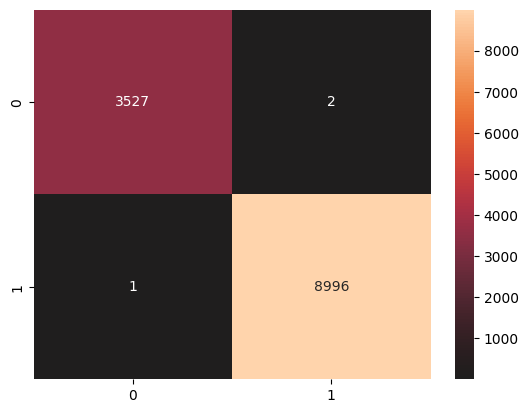

Confusion Matrix is
 [[3527    2]
 [   1 8996]]


In [61]:
y_pred_GB = GBCModel.predict(x_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True, annot=True,fmt='g')
plt.show()

print('Confusion Matrix is\n', CM_GB)

4.Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=33)

In [48]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))

DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  0.9998403321092129


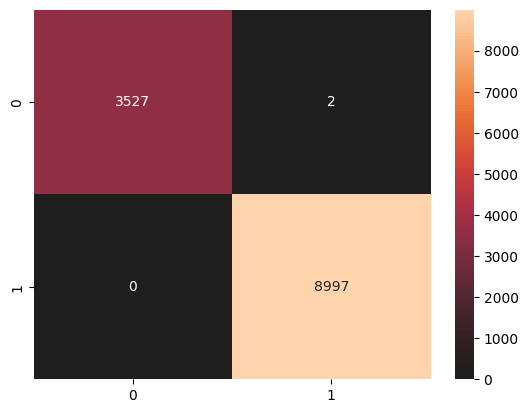

Confusion Matrix is
 [[3527    2]
 [   0 8997]]


In [62]:

y_pred_DT = DecisionTreeClassifierModel.predict(x_test)
CM_DT = confusion_matrix(y_test, y_pred_DT)

sns.heatmap(CM_DT, center=True, annot=True,fmt='g')
plt.show()

print('Confusion Matrix is\n', CM_DT)

5.Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionmodel = LogisticRegression(max_iter = 100000)
LogisticRegressionmodel.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [53]:

print('LogisticRegressionClassifierModel Train Score is : ' , LogisticRegressionmodel.score(x_train, y_train))
print('LogisticRegressionClassifierModel Test Score is : ' , LogisticRegressionmodel.score(x_test, y_test))

LogisticRegressionClassifierModel Train Score is :  0.8796503273191761
LogisticRegressionClassifierModel Test Score is :  0.8838416094523391


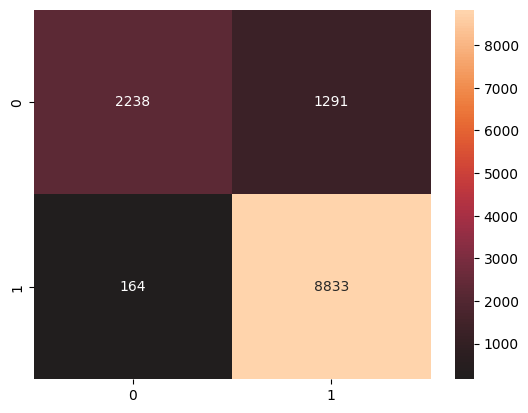

Confusion Matrix is
 [[2238 1291]
 [ 164 8833]]


In [63]:
y_pred_LR = LogisticRegressionmodel.predict(x_test)
CM_LR = confusion_matrix(y_test, y_pred_LR)

sns.heatmap(CM_LR, center=True, annot=True,fmt='g')
plt.show()

print('Confusion Matrix is\n', CM_LR)